# **ANALYZE DATA ĐIỂM THI TỐT NGHIỆP THPT NĂM 2024 VÀ DỰ ĐOÁN**




#### Họ và tên người làm: Phan Huy Thịnh

## 1. Tiền xử lý dữ liệu

In [21]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Tải dữ liệu

In [ ]:
# Tải file từ máy tính lên Google Colab
uploaded = files.upload()

# Đọc file CSV vào Pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving diem_thi_thpt_2024.csv to diem_thi_thpt_2024 (6).csv


In [ ]:
df.head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


### Kiểm tra loại dữ liệu các cột

In [ ]:
df_types = df.dtypes
df_types

sbd               int64
toan            float64
ngu_van         float64
ngoai_ngu       float64
vat_li          float64
hoa_hoc         float64
sinh_hoc        float64
lich_su         float64
dia_li          float64
gdcd            float64
ma_ngoai_ngu     object
dtype: object

### Kiểm tra dữ liệu thiếu và trùng lặp

In [ ]:
# Kiểm tra các giá trị bị thiếu
missing_values = df.isnull().sum()
missing_values

sbd                  0
toan             15992
ngu_van          11504
ngoai_ngu       148900
vat_li          715990
hoa_hoc         715087
sinh_hoc        719227
lich_su         355391
dia_li          356923
gdcd            477996
ma_ngoai_ngu    148900
dtype: int64

In [ ]:
# Kiểm tra các giá trị bị trùng lặp
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

### Loại bỏ các cột không cần thiết

In [ ]:
df = df.drop(columns=['sbd', 'ma_ngoai_ngu'])

## 2. Explore data analysis

### Vẽ biểu đồ phân phối môn toán

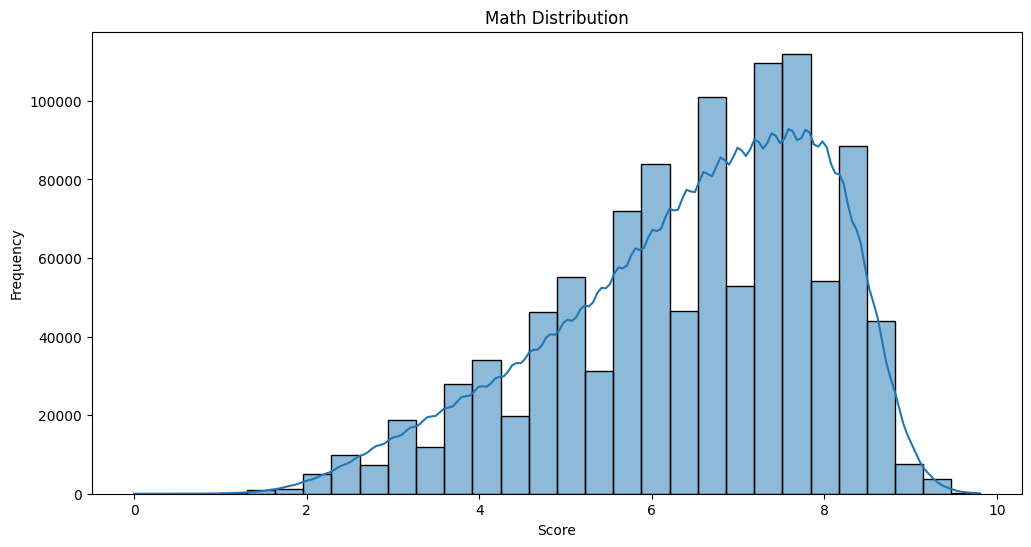

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['toan'], kde=True, bins=30)
plt.title('Math Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Biểu đồ phân phối môn văn

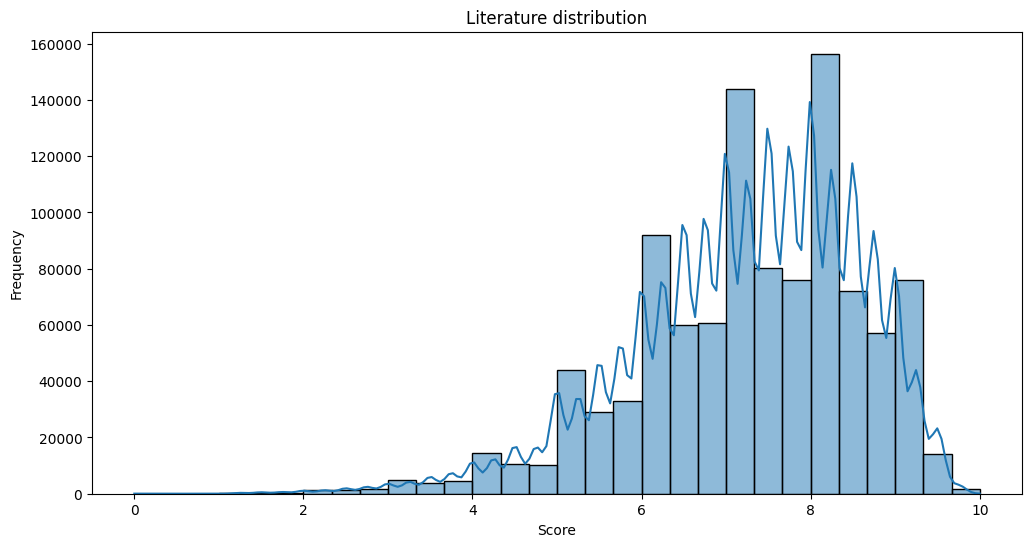

In [ ]:
# Vẽ biểu đồ phân phối điểm cho môn Văn
plt.figure(figsize=(12, 6))
sns.histplot(df['ngu_van'], kde=True, bins=30)
plt.title('Literature distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Ma trận tương quan giữa môn toán và các môn KHTN (Lý, Hóa, Sinh)

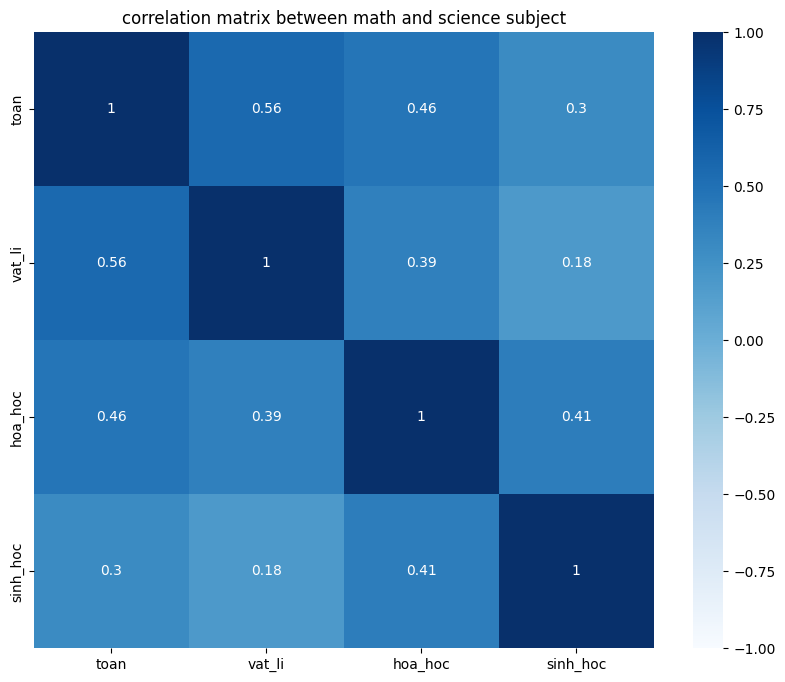

In [ ]:
# Calculate corr()
selected_columns = ['toan', 'vat_li', 'hoa_hoc', 'sinh_hoc']
df_selected = df[selected_columns]
correlation_matrix = df_selected.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.title('correlation matrix between math and science subject')
plt.show()

#### Nhận xét: Những thí sinh điểm cao trong môn toán dường như điểm vật lý cũng tốt (0.56), và điểm hóa học cũng ổn (0.46).

### Ma trận tương quan giữa môn văn và các môn KHXH (Sử, Địa, GDCD)

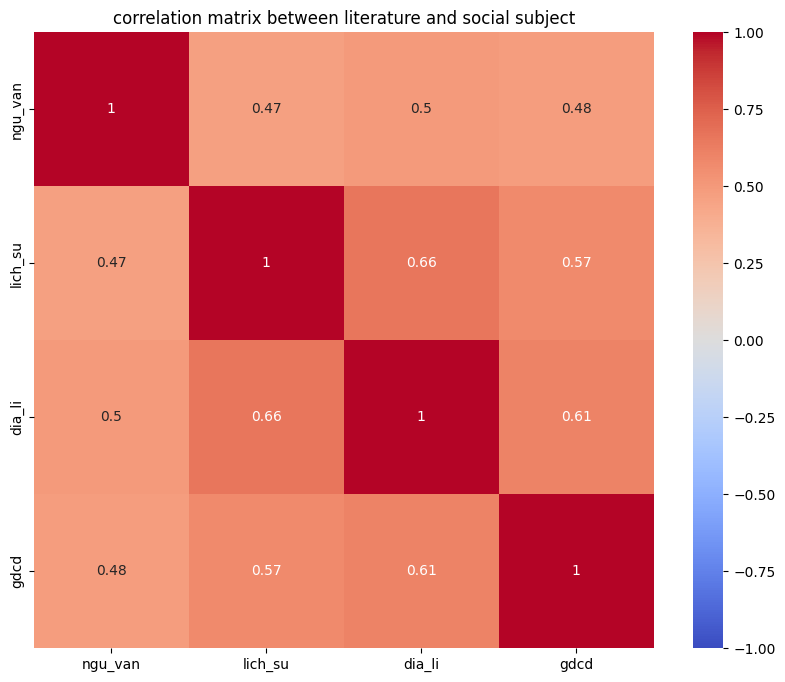

In [ ]:
# Calculate corr()
selected_columns = ['ngu_van', 'lich_su', 'dia_li', 'gdcd']
df_selected = df[selected_columns]
correlation_matrix = df_selected.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('correlation matrix between literature and social subject')
plt.show()

#### Nhận xét: Môn văn ít tương quan với cả ba môn. Nhưng môn lịch sử tương quan mạnh với môn địa lý (0.66).

### Biểu đồ tròn số lượng thí sinh thi tổ hợp KHTN và ban KHXH



In [ ]:
# Tính số lượng thí sinh thi ban KHTN
num_khtn = df[(df['lich_su'].isna()) & (df['dia_li'].isna()) & (df['gdcd'].isna())].shape[0]

# Tính số lượng thí sinh thi ban KHXH
num_khxh = df[(df['vat_li'].isna()) & (df['hoa_hoc'].isna()) & (df['sinh_hoc'].isna())].shape[0]

# Tạo DataFrame chứa kết quả
data = {
    'To_hop': ['KHTN', 'KHXH'],
    'So_luong_thi_sinh': [num_khtn, num_khxh]
}

df_to_hop = pd.DataFrame(data)

In [ ]:
df_to_hop

,To_hop,So_luong_thi_sinh
0,KHTN,354723
1,KHXH,713228


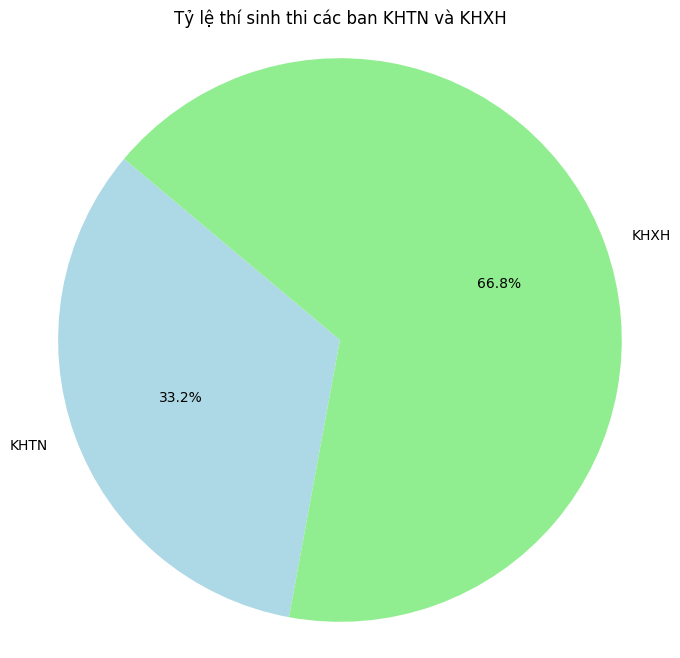

In [ ]:
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(df_to_hop['So_luong_thi_sinh'], labels=df_to_hop['To_hop'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Tỷ lệ thí sinh thi các ban KHTN và KHXH')
plt.axis('equal')
plt.show()

#### Nhận xét: Số thí sinh thi tổ hợp KHXH nhiều gấp đôi số thi sinh thi tổ hợp KHTN

### Tính điểm trung bình cho các khối môn học

A00 (Toán, Lý, Hóa)

A01 (Toán, Lý, Ngoại Ngữ)

B00 (Toán, Hóa, Sinh)

C00 (Văn, Sử, Địa)

D01 (Toán, Văn, Ngoại Ngữ)


In [ ]:
def calculate_scores(df):
    df['A00'] = df[['toan', 'vat_li', 'hoa_hoc']].apply(lambda row: row.sum() if not row.isna().any() else pd.NA, axis=1)
    df['A01'] = df[['toan', 'vat_li', 'ngoai_ngu']].apply(lambda row: row.sum() if not row.isna().any() else pd.NA, axis=1)
    df['B00'] = df[['toan', 'hoa_hoc', 'sinh_hoc']].apply(lambda row: row.sum() if not row.isna().any() else pd.NA, axis=1)
    df['C00'] = df[['ngu_van', 'lich_su', 'dia_li']].apply(lambda row: row.sum() if not row.isna().any() else pd.NA, axis=1)
    df['D01'] = df[['toan', 'ngu_van', 'ngoai_ngu']].sum(axis=1, skipna=True)
    return df

# Áp dụng hàm tính điểm
df = calculate_scores(df)

# Bỏ qua điểm C00 nếu các cột sử, địa, gdcd đều là NaN
df.loc[(df['lich_su'].isna()) & (df['dia_li'].isna()) & (df['gdcd'].isna()), 'C00'] = pd.NA

# Bỏ qua điểm A00, A01, B00 nếu các cột lý, hóa, sinh đều là NaN
df.loc[(df['vat_li'].isna()) & (df['hoa_hoc'].isna()) & (df['sinh_hoc'].isna()), ['A00', 'A01', 'B00']] = pd.NA

# Tính điểm trung bình cho từng khối
mean_scores = {
    'A00': df['A00'].mean(skipna=True),
    'A01': df['A01'].mean(skipna=True),
    'B00': df['B00'].mean(skipna=True),
    'C00': df['C00'].mean(skipna=True),
    'D01': df['D01'].mean(skipna=True)
}

In [ ]:
df.head()

,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,A00,A01,B00,C00,D01
0,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,19.65,22.4,18.65,<NA>,23.15
1,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,<NA>,<NA>,<NA>,21.75,24.30
2,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,<NA>,<NA>,<NA>,23.25,25.15
3,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,<NA>,<NA>,<NA>,21.5,20.70
4,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,<NA>,<NA>,<NA>,26.75,25.40


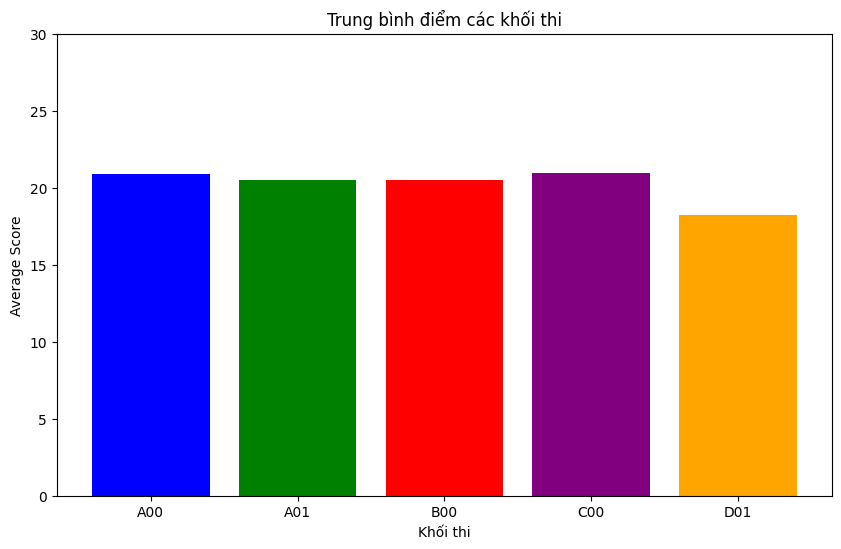

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(mean_scores.keys(), mean_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Trung bình điểm các khối thi')
plt.xlabel('Khối thi')
plt.ylabel('Average Score')
plt.ylim(0, 30)
plt.show()

#### Nhận xét: Điểm giữa các tổ hợp có vẻ cân bằng, điểm trung bình khoảng 20. Khối C00 có phần cao hơn so với các khối khác.

## 3. Kiểm tra và loại bỏ các outliers

### Kiểm tra outliers (Vẽ boxplot)

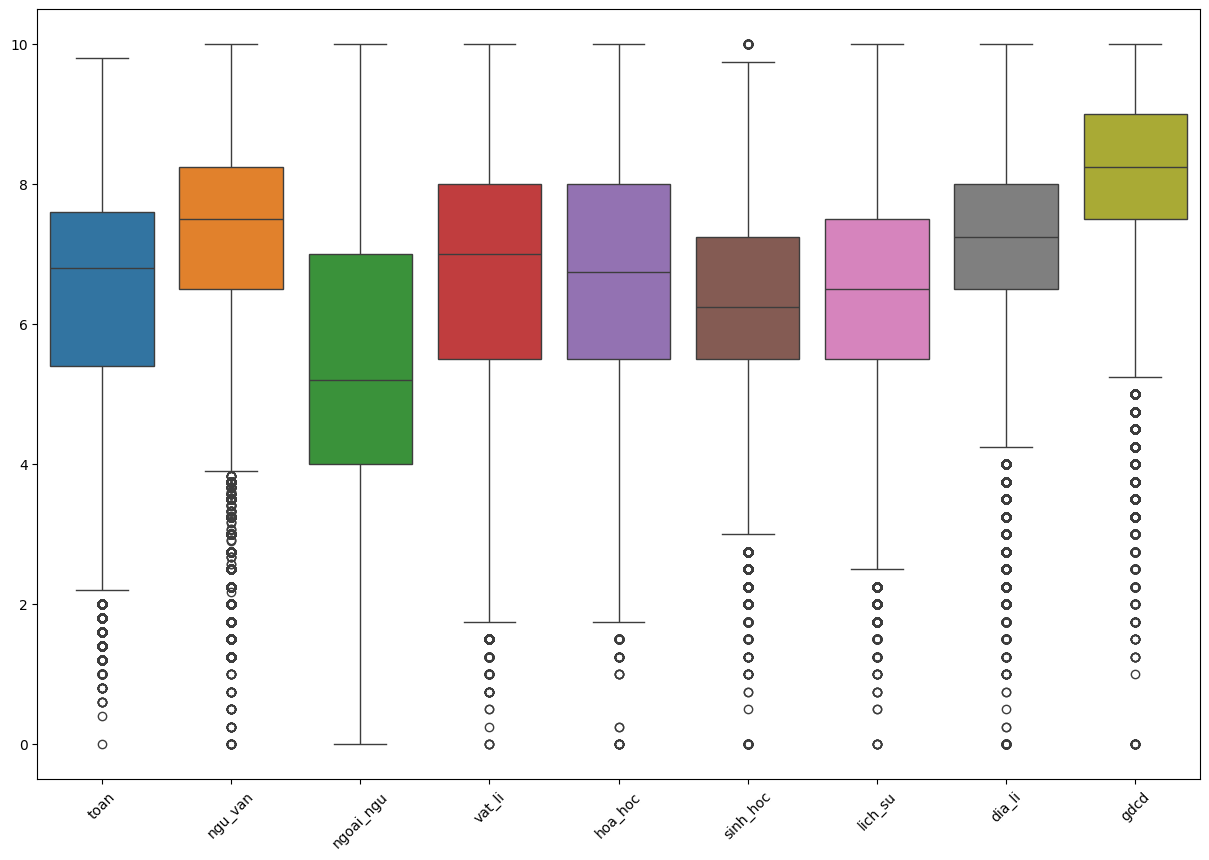

In [ ]:
plt.figure(figsize=(15, 10))

# Vẽ boxplot để kiểm tra outliers
# sns.boxplot(data = df.drop(columns=['A00','A01','B00','C00','D01']))
sns.boxplot(data = df)
plt.xticks(rotation=45)
plt.show()

### Xử lý các giá trị outliers


Num of col before remove outliers: 1061605
Num of col after remove outliers: 1026913


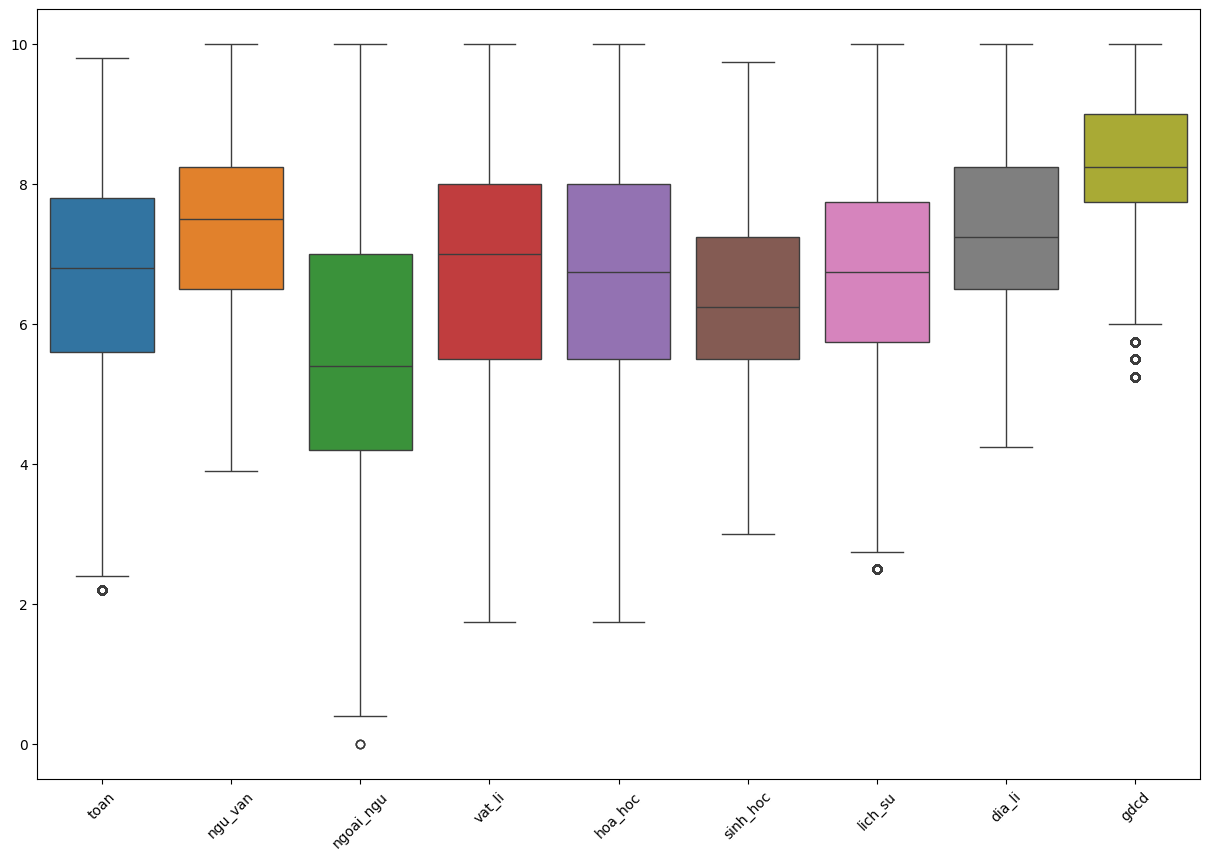

In [ ]:
# Xác định và loại bỏ outliers
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Loại bỏ outliers
df_cleaned = remove_outliers(df)

# Kiểm tra số lượng hàng trước và sau khi loại bỏ outliers
print(f"\nNum of col before remove outliers: {df.shape[0]}")
print(f"Num of col after remove outliers: {df_cleaned.shape[0]}")

# Hiển thị boxplot sau khi loại bỏ outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

## 4. Apply Machine Learning Model (ví dụ cho môn toán)

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Tạo tập training và testing

In [ ]:
df_cleaned = df_cleaned.dropna(subset=['toan'])

selected_columns = ['ngu_van', 'ngoai_ngu']
X = df_cleaned[selected_columns]
y = df_cleaned['toan']

# Drop các hàng có giá trị NaN trong các đặc trưng
X = X.dropna()
# Đảm bảo y chỉ chứa các giá trị tương ứng với X
y = y.loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R^2: {r2_xgb}")

XGBoost - MSE: 1.3052065959686059, MAE: 0.8953892059009534, R^2: 0.34077863918769846


### Random Forest

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R^2: {r2_rf}")

Random Forest - MSE: 1.306347299435025, MAE: 0.8956474569101136, R^2: 0.3402025035063905


### MLP Regressor

In [ ]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_regressor.fit(X_train, y_train)
y_pred_mlp = mlp_regressor.predict(X_test)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"MLP Regressor - MSE: {mse_mlp}, MAE: {mae_mlp}, R^2: {r2_mlp}")

MLP Regressor - MSE: 1.3048676252158475, MAE: 0.8944714809013442, R^2: 0.34094984331859934


## 5. So sánh các model, cho biết model nào tốt nhất và dự đoán kết quả.

### So sánh các model

In [ ]:
result = {
    'Random Forest': {'MSE': mse_rf, 'MAE': mae_rf, 'R^2': r2_rf},
    'XGBoost': {'MSE': mse_xgb, 'MAE': mae_xgb, 'R^2': r2_xgb},
    'MLP Regressor': {'MSE': mse_mlp, 'MAE': mae_mlp, 'R^2': r2_mlp}
}

result_df = pd.DataFrame(result).T
result_df

,MSE,MAE,R^2
Random Forest,1.306347,0.895647,0.340203
XGBoost,1.305207,0.895389,0.340779
MLP Regressor,1.304868,0.894471,0.340950


### Lựa chọn mô hình tốt nhất

In [ ]:
best_model_name = result_df['R^2'].idxmax()
best_model = {
    'Random Forest': random_forest_model,
    'XGBoost': xgb_reg,
    'MLP Regressor': mlp_regressor
}[best_model_name]
print(f"Best model: {best_model_name}")

Best model: MLP Regressor


### Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu


In [ ]:
best_model.fit(X, y)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

### Dự đoán điểm Toán năm 2025

In [22]:
predictions_2025 = best_model.predict(X)
predictions_2025

array([7.48695003, 7.46407585, 7.72948256, ..., 7.35707355, 5.76214425,
       5.62077567])

### Dự đoán điểm trung bình và phần trăm phổ điểm môn toán năm 2025

In [24]:
# Tính trung bình dự đoán của điểm toán
avg_prediction = np.mean(predictions_2025)
print(f"Predicted average math scores for 2025: {avg_prediction}")

Predicted average math scores for 2025: 6.645605750033719


#### Nhận xét: Dự đoán trung bình điểm toán năm 2025 sẽ là 6.646.

### Tính tỉ lệ (phần trăm) dự đoán thí sinh trong khoảng 5.0 đến 7.8 và phần trăm dự đoán thí sinh trên 8.

In [32]:
# Tính tỉ lệ điểm trong khoảng 5.0 đến 7.8
ratio_5_to_7_point_8 = np.sum((predictions_2025 >= 5.0) & (predictions_2025 <= 7.8)) / len(predictions_2025)

# Tính tỉ lệ điểm trên 8
ratio_above_8 = np.sum(predictions_2025 >= 8.0) / len(predictions_2025)

print(f"Tỉ lệ điểm trong khoảng 5.0 đến 7.8: {ratio_5_to_7_point_8:.2f}")
print(f"Tỉ lệ điểm trên 8: {ratio_above_8:.2f}")

Tỉ lệ điểm trong khoảng 5.0 đến 7.8: 0.91
Tỉ lệ điểm trên 8: 0.01


#### Nhận xét: Dự đoán năm 2025 có 91% thí sinh có điểm trong khoảng 5.0 đến 7.8 và chỉ có 1% thí sinh có điểm toán trên 8.

### Vẽ biểu đồ so sánh các model

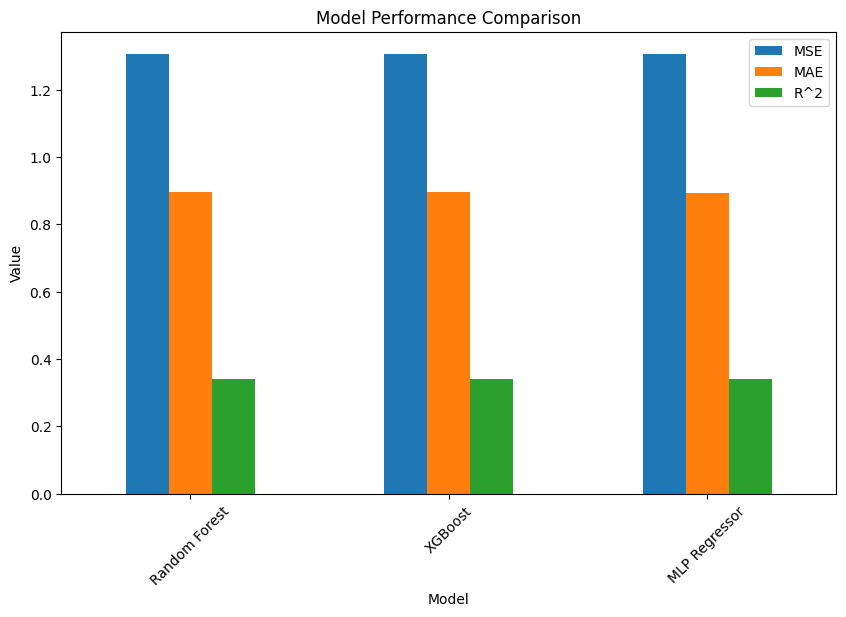

In [ ]:
result_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

#### Nhận xét: Ba model này có hiệu suất tương đương nhau, nhưng MLPRegressor có hiệu suất tốt hơn một chút, nhưng thời gian chạy lại lâu nhất trong cả 3 model.

### **Lưu ý**: Đây chỉ là minh họa cho một bài Data Analysis hoàn chỉnh, vui lòng không lấy điểm dự đoán này làm chuẩn vì các thuật toán chỉ dự đoán một cách tương đối và năm 2025 sẽ không thi tốt nghiệp THPT theo cấu trúc từ năm 2017 như trước nữa.